In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import preproc as pp

import tensorflow as tf

version = "v2"
augp = Path("../scratch").joinpath("train_augmented_" + version)
modelp = Path("../scratch").joinpath("models")

train_ir, test_ir = pp.load_data(val_size=0)
train_aug, test_aug = pp.load_aug_data(augp, train_ir.element_spec, test_ind=[5])

2023-03-01 09:20:18.372245: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-01 09:20:20.978642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-01 09:20:21.291365: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:31:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.41GiB deviceMemoryBandwidth: 1.41TiB/s
2023-03-01 09:20:21.291391: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-01 09:20:21.294178: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-01 09:20:21.294234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056

In [4]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(10000, reshuffle_each_iteration=False)
val_ds = splitter.take(train_shape * val_size)
train_ds = splitter.skip(train_shape * val_size)

2023-03-01 09:20:55.767159: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-01 09:20:55.767180: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-01 09:20:55.776077: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-01 09:20:55.815091: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.11.1
2023-03-01 09:20:55.947685: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-01 09:20:55.947797: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/20


2023-03-01 09:20:56.717302: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-01 09:20:56.737635: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-03-01 09:20:56.791236: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-01 09:20:57.369092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-03-01 09:20:57.371400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


  1/235 [..............................] - ETA: 12:44 - loss: 2.3210 - accuracy: 0.0820

2023-03-01 09:20:59.457917: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  2/235 [..............................] - ETA: 3:36 - loss: 2.3070 - accuracy: 0.1104 

2023-03-01 09:20:59.630553: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-01 09:20:59.630574: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


 71/235 [========>.....................] - ETA: 10s - loss: 1.3590 - accuracy: 0.5807

2023-03-01 09:21:00.480385: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-01 09:21:00.480563: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-01 09:21:00.506022: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 112 callback api events and 100 activity events. 
2023-03-01 09:21:00.509638: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-01 09:21:03.873226: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: base_logs/train/plugins/profile/2023_03_01_09_21_00
2023-03-01 09:21:03.877200: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to base_logs/train/plugins/profile/2023_03_01_09_21_00/erc-hpc-comp034.trace.json.gz
2023-03-01 09:21:03.884207: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: bas

235/235 [==============================] - 13s 40ms/step - loss: 0.7731 - accuracy: 0.7636 - val_loss: 0.0787 - val_accuracy: 0.9765
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1118 - accuracy: 0.9667 - val_loss: 0.0484 - val_accuracy: 0.9825
Epoch 3/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9772 - val_loss: 0.0386 - val_accuracy: 0.9870
Epoch 4/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 5/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.0281 - val_accuracy: 0.9903
Epoch 6/20
235/235 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9878
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0280 - val_accuracy: 0.9906
Epoch 8/20
235/

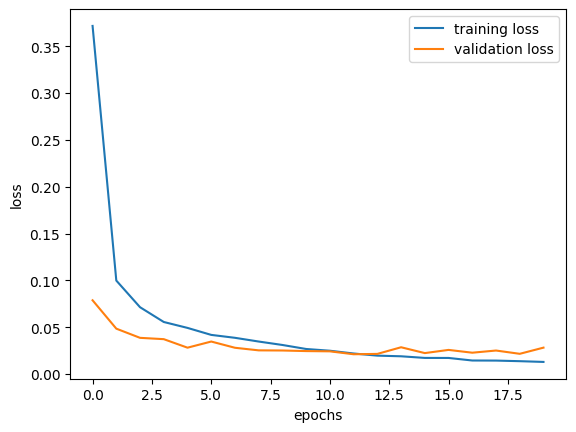

In [5]:
import datetime

net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = net.fit(
    train_ir.batch(256)
    , validation_data=test_ir.batch(256)
    , epochs=20
    , callbacks=[tf.keras.callbacks.TensorBoard(log_dir="base_logs", histogram_freq=1, write_graph=True, write_images=True)]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [6]:
(x_train, y_train), (x_test, y_test) = pp.load_data(return_eval=True)

net.evaluate(x_train, y_train), net.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9921


([0.007296211086213589, 0.9976000189781189],
 [0.028153466060757637, 0.9921000003814697])

In [7]:
net.evaluate(train_ds.batch(1048)), net.evaluate(val_ds.batch(1048)), net.evaluate(test_aug.batch(512))

118/118 [==============================] - 1s 10ms/step - loss: 4.7311 - accuracy: 0.3292


([4.733994483947754, 0.327958345413208],
 [4.724419593811035, 0.3263518512248993],
 [4.731097221374512, 0.32919999957084656])

In [8]:
net.save(modelp.joinpath("base.h5").resolve().as_posix(), save_format="h5")